In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('NYC_crime.csv')

In [3]:
data.head()

,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0


# Handling Columns

In [4]:
c_data = data.rename(columns={':@computed_region_f5dn_yrer' : 'Community District',
                             ':@computed_region_yeji_bk3q' : 'Borough Boundaries',
                             ':@computed_region_92fq_4b7q' : 'City Council Districts',
                             ':@computed_region_sbqj_enih' : 'Police Precincts'})
c_data = c_data.drop(columns=['Unnamed: 0'])
c_data['arrest_date'] = pd.to_datetime(c_data['arrest_date'], format='%Y-%m-%d')
c_data['law_cat_cd'] = c_data['law_cat_cd'].map({'F':'Felony',
                                                'M':'Misdemeanor',
                                                'V':'Violation',
                                                'I':'Infractions'})

In [5]:
c_data.head()

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,Community District,Borough Boundaries,City Council Districts,Police Precincts
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,Felony,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,Felony,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,Misdemeanor,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0


In [6]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881989 entries, 0 to 3881988
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   arrest_key              int64         
 1   arrest_date             datetime64[ns]
 2   pd_desc                 object        
 3   ofns_desc               object        
 4   law_code                object        
 5   law_cat_cd              object        
 6   age_group               object        
 7   perp_sex                object        
 8   perp_race               object        
 9   latitude                float64       
 10  longitude               float64       
 11  arrest_boro             object        
 12  arrest_precinct         int64         
 13  jurisdiction_code       float64       
 14  Community District      float64       
 15  Borough Boundaries      float64       
 16  City Council Districts  float64       
 17  Police Precincts        float64       
dtypes:

## Unique Values of each Column

In [7]:
for x in c_data.columns:
    print(f'Unique # of {x}: ', c_data[x].nunique())

Unique # of arrest_key:  3881989
Unique # of arrest_date:  5113
Unique # of pd_desc:  434
Unique # of ofns_desc:  99
Unique # of law_code:  2317
Unique # of law_cat_cd:  4
Unique # of age_group:  5
Unique # of perp_sex:  2
Unique # of perp_race:  8
Unique # of latitude:  99617
Unique # of longitude:  104801
Unique # of arrest_boro:  5
Unique # of arrest_precinct:  77
Unique # of jurisdiction_code:  27
Unique # of Community District:  71
Unique # of Borough Boundaries:  5
Unique # of City Council Districts:  51
Unique # of Police Precincts:  77


In [10]:
import folium # goelogical map
map_1 = folium.Map(location=[40.7128,-73.9060 ],tiles='OpenStreetMap',
 zoom_start=11)
for each in c_data[:2500].iterrows():
    if each[1]['law_cat_cd'] == 'Misdemeanor':
        folium.CircleMarker([each[1]['latitude'],each[1]['longitude']],
                            radius=2,
                            color='navy',
                            tooltip=str(each[1]['law_cat_cd']),
                            fill_opacity=0.4,
                            opacity=0.4
                            ).add_to(map_1)
    elif each[1]['law_cat_cd'] == 'Felony':
        folium.CircleMarker([each[1]['latitude'],each[1]['longitude']],
                            radius=2,
                            color='orange',
                            tooltip=str(each[1]['law_cat_cd']),
                            fill_opacity=0.4,
                            opacity=0.4
                            ).add_to(map_1)
    elif each[1]['law_cat_cd'] == 'Violation':
        folium.CircleMarker([each[1]['latitude'],each[1]['longitude']],
                            radius=2,
                            color='green',
                            tooltip=str(each[1]['law_cat_cd']),
                            fill_opacity=0.4,
                            opacity=0.4
                            ).add_to(map_1)
    elif each[1]['law_cat_cd'] == 'Infractions':
        folium.CircleMarker([each[1]['latitude'],each[1]['longitude']],
                            radius=2,
                            color='red',
                            tooltip=str(each[1]['law_cat_cd']),
                            fill_opacity=0.4,
                            opacity=0.4
                            ).add_to(map_1)
map_1

- Navy Circle: Misdemeanor
- Orange Circle: Felony
- Green Circle: Violation
- Red Circle: Infraction

## Visualize Data By Arrest_Date

In [11]:
c_data['arrest_date'].describe()

<ipython-input-11-04c19a4ffdac>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  c_data['arrest_date'].describe()


count                 3881989
unique                   5113
top       2009-02-11 00:00:00
freq                     1391
first     2006-01-01 00:00:00
last      2019-12-31 00:00:00
Name: arrest_date, dtype: object

In [12]:
c_data['arrest_date'].dt.year.value_counts()

2011    325670
2010    323694
2009    323116
2008    319502
2007    313739
2014    304175
2012    303697
2013    298305
2006    287856
2015    259333
2016    250745
2017    225419
2018    184860
2019    161878
Name: arrest_date, dtype: int64

Above shows that the crime occurred the most in 2009-02-11 (1391 Times), while by year, the highest crime rate year is 2011

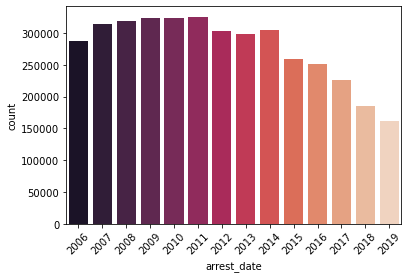

In [13]:
y_arrest_date = c_data['arrest_date'].dt.year
sns.countplot(x=y_arrest_date, palette='rocket')
_ = plt.xticks(rotation=45)

The Crime Occurrence has been decreasing annually

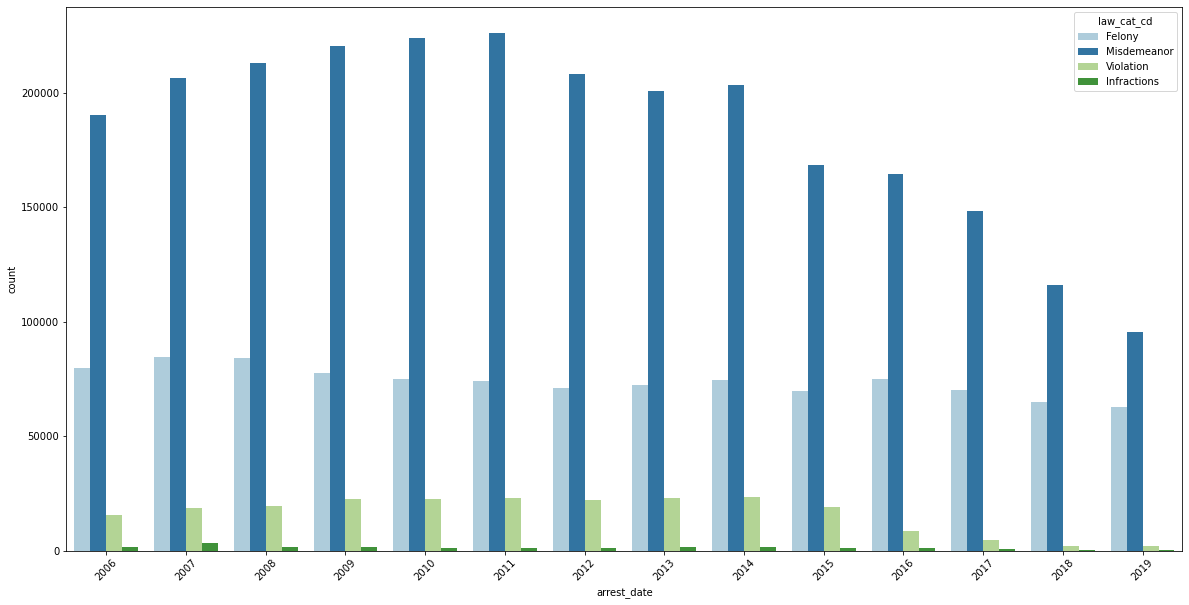

In [14]:
custom_palette = sns.color_palette("Paired", 9)
plt.figure(figsize=(20,10))
sns.countplot(x=y_arrest_date, palette=custom_palette, hue=c_data['law_cat_cd'])
_ = plt.xticks(rotation=45)

The Number of Misdemeanor,Infraction and Violation Offense have been decreasing while the Number of Felony has been the same since 2006

## Visualize Data by Race/Sex

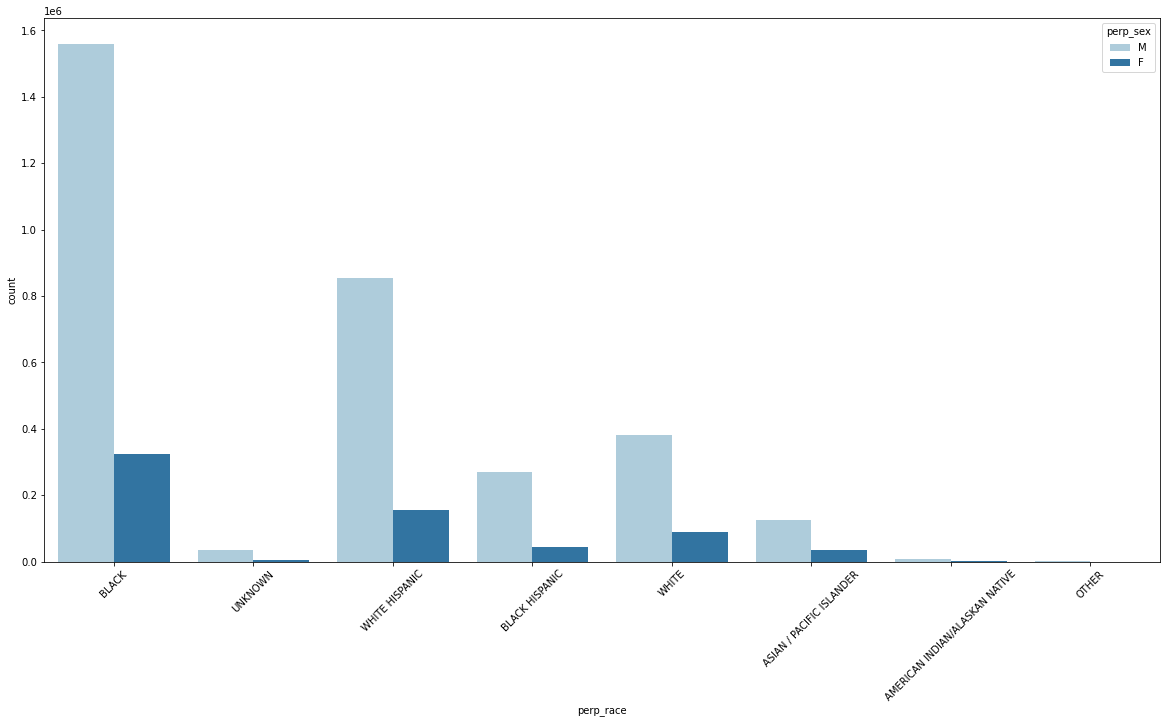

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x=c_data['perp_race'], palette=custom_palette, hue=c_data['perp_sex'])
_ = plt.xticks(rotation=45)

Above shows that Male has higher crime rate than that of Female, and Black People committed more crimes compared to other race

## Visualize Data by Age Group

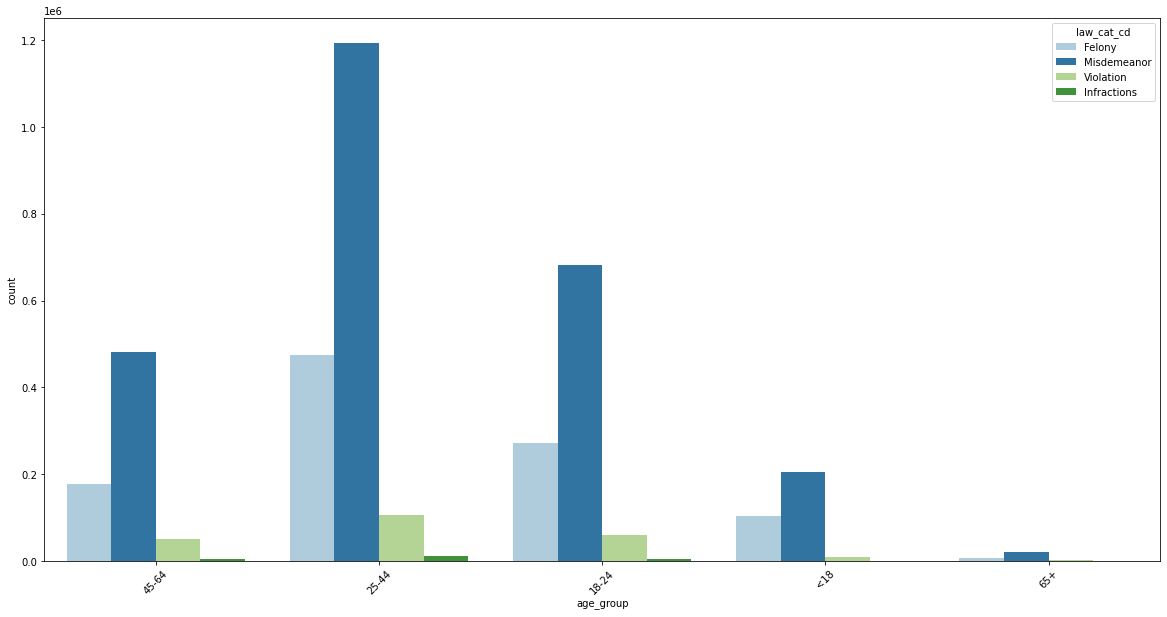

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=c_data['age_group'], palette=custom_palette, hue=c_data['law_cat_cd'])
_ = plt.xticks(rotation=45)

Among all the Age Groups, the relative weight of each offense is the same (Misdemeanor > Felony > Violation > Infraction)

## Separation of Community Districts with most recent data

In [17]:
recent_data = c_data[c_data['arrest_date'].dt.year == 2019]
recent_data

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,Community District,Borough Boundaries,City Council Districts,Police Precincts
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
6,196324211,2019-04-23,RAPE 1,RAPE,PL 1303501,Felony,45-64,M,BLACK HISPANIC,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
7,196785901,2019-05-04,"SEXUAL ABUSE 3,2",SEX CRIMES,PL 13052A1,Misdemeanor,25-44,M,BLACK,40.883383,-73.902333,B,50,0.0,48.0,5.0,40.0,33.0
8,197554056,2019-05-23,"SEXUAL ABUSE 3,2",SEX CRIMES,PL 13052A1,Misdemeanor,45-64,F,BLACK,40.814850,-73.956682,M,26,0.0,37.0,4.0,23.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162613,205100068,2019-11-13,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,PL 1552500,Misdemeanor,45-64,M,BLACK,40.742962,-73.955274,Q,108,0.0,53.0,3.0,33.0,66.0
162614,205928412,2019-12-03,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,PL 215510B,Felony,65+,M,ASIAN / PACIFIC ISLANDER,40.645023,-74.077217,S,120,0.0,4.0,1.0,13.0,74.0
162615,205007230,2019-11-11,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200501,Felony,25-44,M,BLACK,40.869407,-73.879998,B,52,0.0,24.0,5.0,40.0,34.0
162616,205004585,2019-11-11,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200511,Felony,45-64,M,BLACK,40.689027,-73.986159,K,84,0.0,68.0,2.0,38.0,54.0


## 2019 Manhattan Crime Rate Visualization (Community Districts)

In [18]:
m_cd_list = [7,11,12,18,19,20,23,37,39,47,56,57,70,71] # Order of Community District on Plot Below
m_data = recent_data[recent_data['arrest_boro'] == 'M']
labels1 = []
for x in m_cd_list:
    labels1.append(str(x) + '\n' + str(round(len(m_data[m_data['Community District'] == x]) / len(m_data) * 100, 2))+'%')

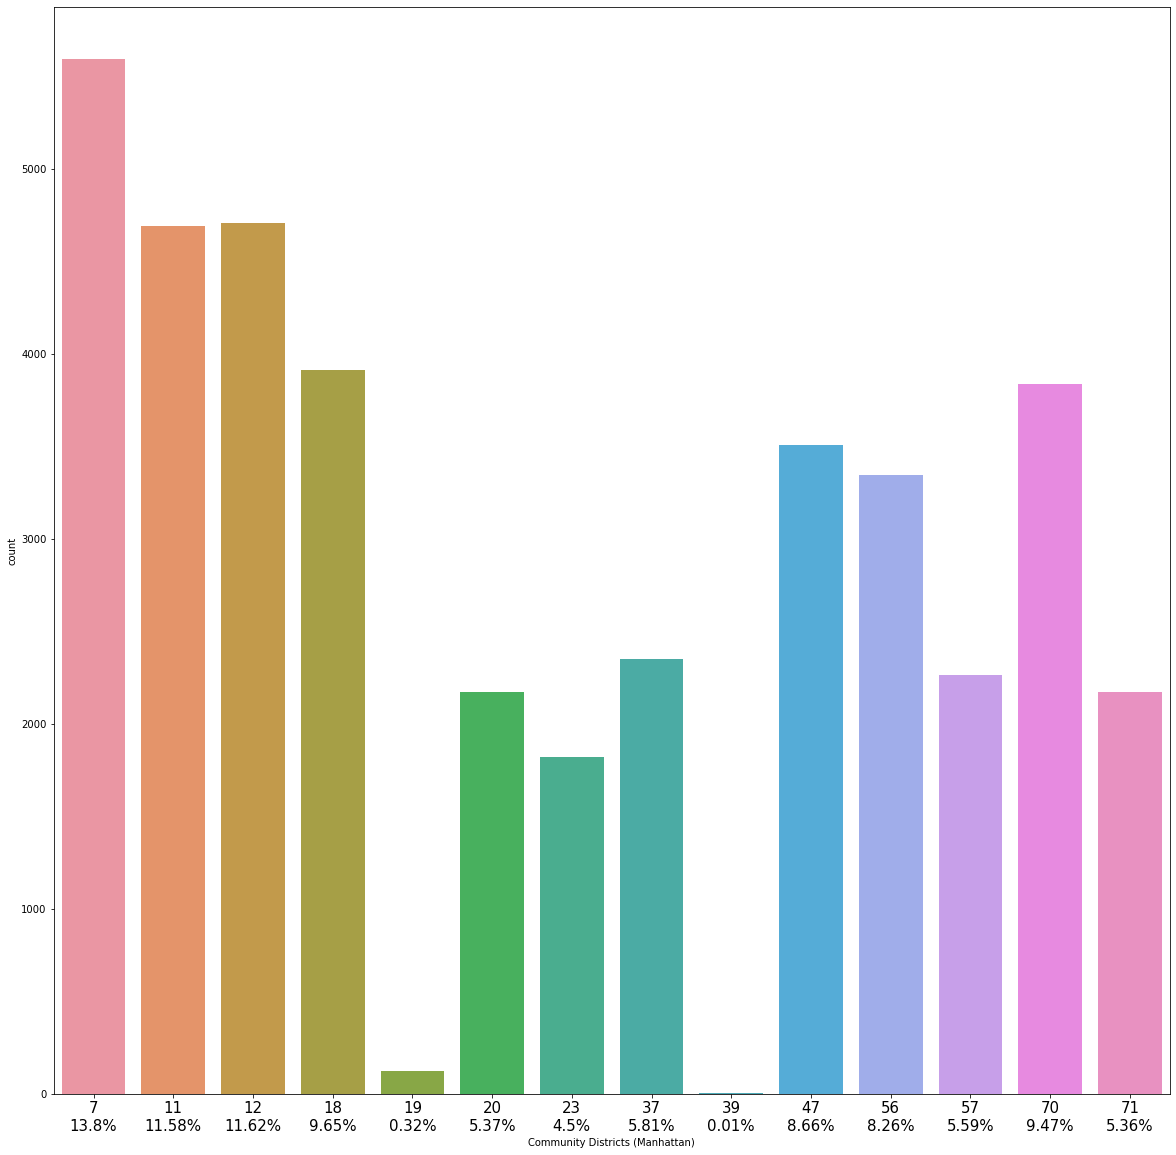

In [19]:
plt.figure(figsize=(20,20))
sns.countplot(x=m_data['Community District'])
_ = plt.xlabel('Community Districts (Manhattan)')
locs, label = plt.xticks()
new_xticks = labels1
_ = plt.xticks(locs, new_xticks, fontsize=15) 

- Tourists Visit Guide (Manhattan)
- Safe Places to Visit : 19, 39
- Concerened Places to Visit : 20, 23, 37, 47, 56, 57, 71
- Dangerous Places to Visit: 7,11,12,18, 70

## 2019 Brooklyn Crime Rate Visualization (Community Districts)

In [21]:
k_cd_list = [1,2,5,9,10,13,14,16,17,21,32,33,36,42,45,46,54,55,60,61,62,68,69]
k_data = recent_data[recent_data['arrest_boro'] == 'K']
labels2 = []
for x in k_cd_list:
    labels2.append(str(x) + '\n' + str(round(len(k_data[k_data['Community District'] == x]) / len(k_data) * 100, 2))+'%')

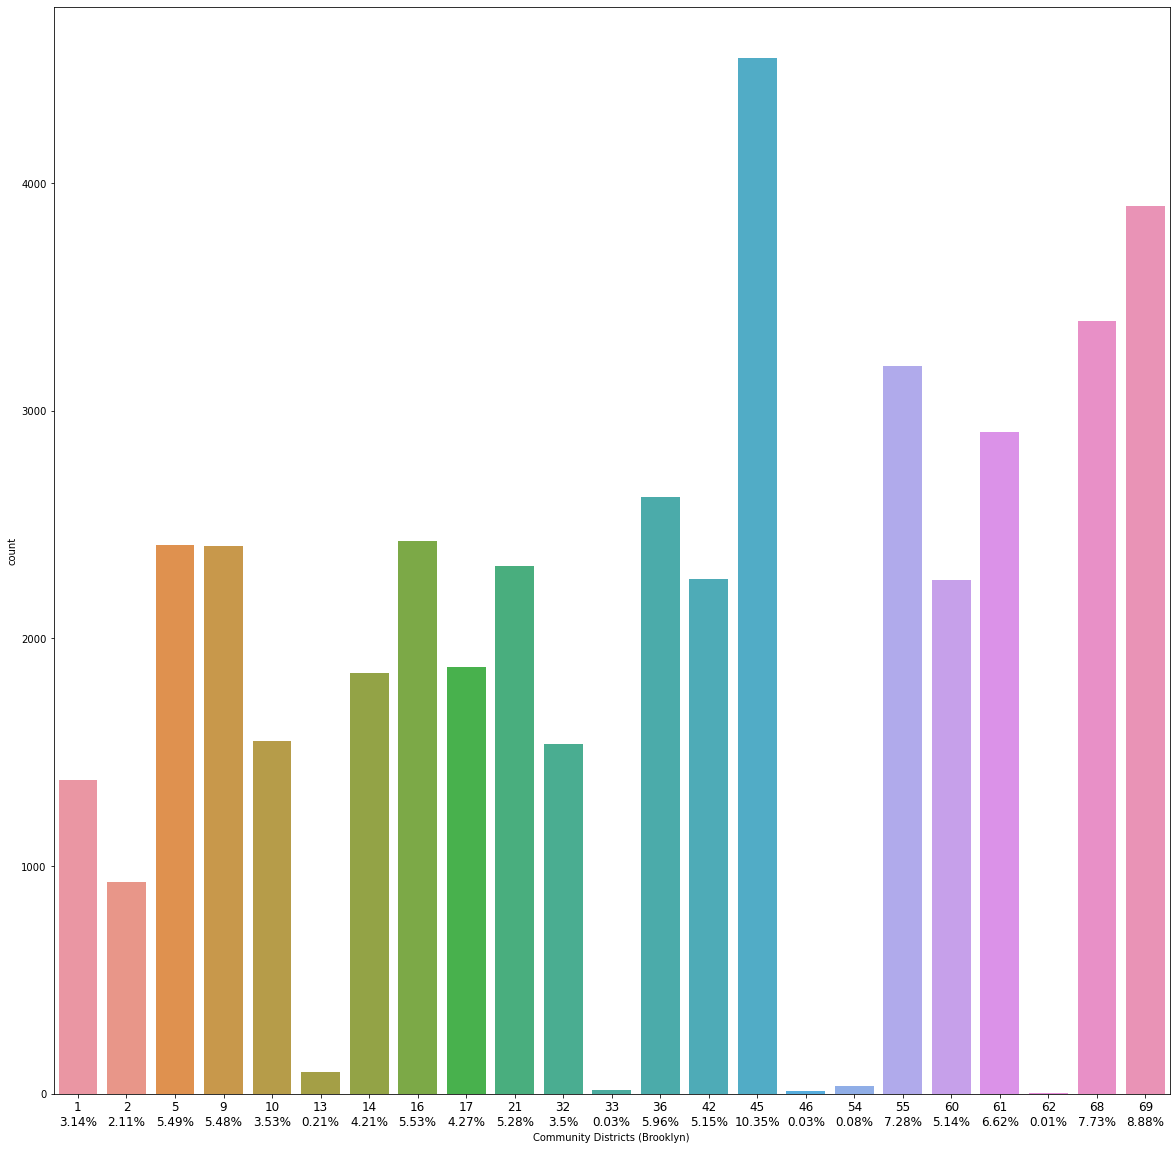

In [22]:
plt.figure(figsize=(20,20))
sns.countplot(x=k_data['Community District'])
_ = plt.xlabel('Community Districts (Brooklyn)')
locs, label = plt.xticks()
new_xticks = labels2
_ = plt.xticks(locs, new_xticks, fontsize=12) 

- Tourists Visit Guide (Brooklyn)
- Safe Places to Visit : 13, 33, 46, 54, 62
- Concerened Places to Visit : 1, 2, 5, 9, 10, 14, 16, 17, 21, 32, 36, 42, 60, 61
- Dangerous Places to Visit: 45, 55, 68, 69, 61

## 2019 Bronx Crime Rate Visualization (Community Districts)

In [23]:
b_cd_list = [6,8,12,24,27,28,29,34,35,43,44,48,49,50,58,59]
b_data = recent_data[recent_data['arrest_boro'] == 'B']
labels3 = []
for x in b_cd_list:
    labels3.append(str(x) + '\n' + str(round(len(b_data[b_data['Community District'] == x]) / len(b_data) * 100, 2))+'%')

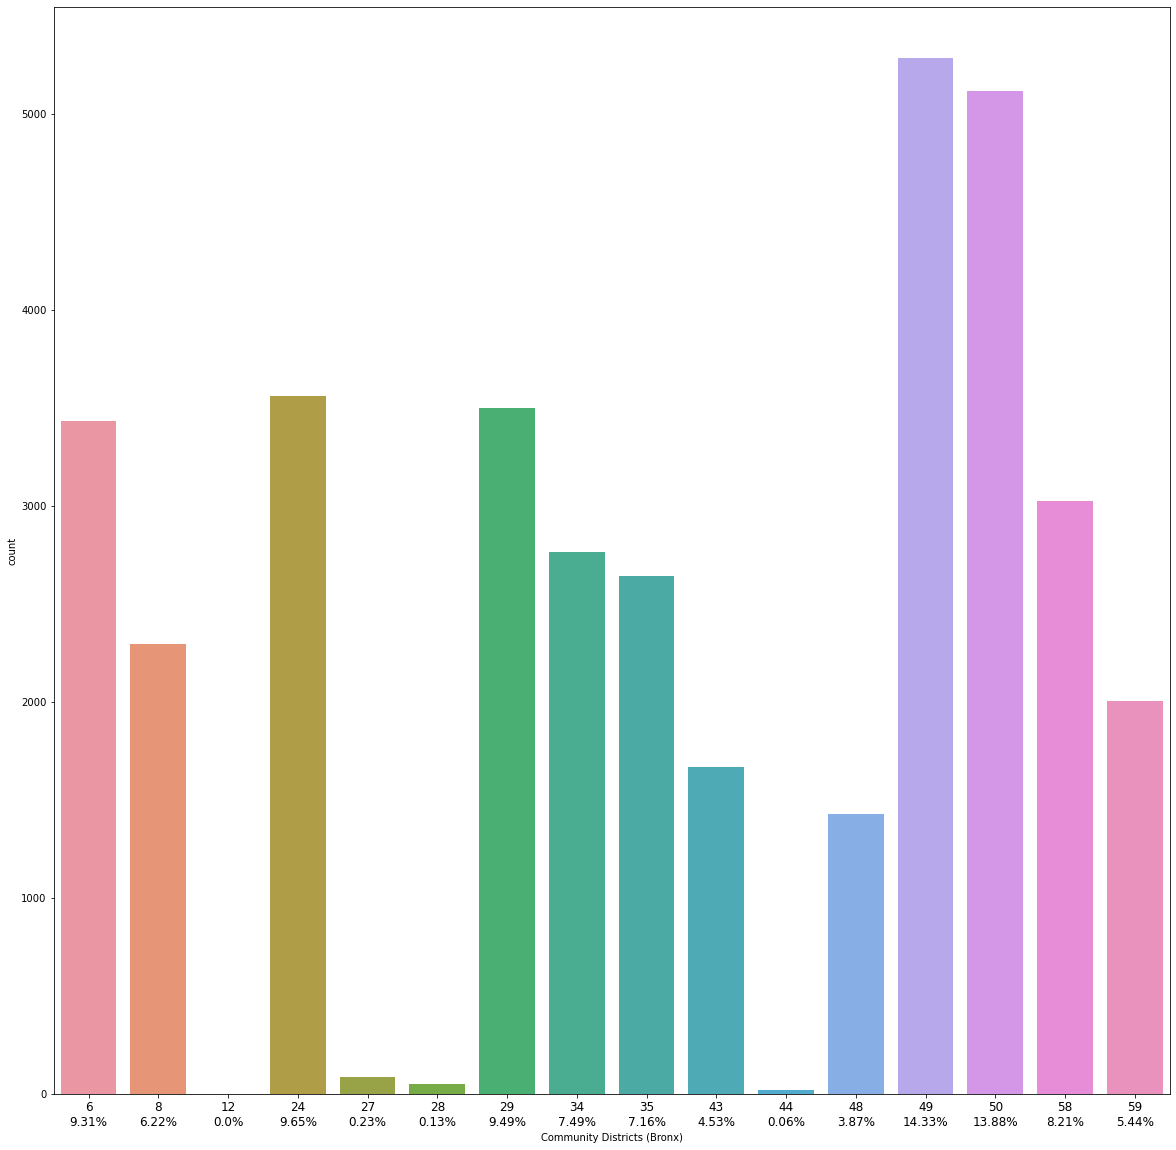

In [24]:
plt.figure(figsize=(20,20))
sns.countplot(x=b_data['Community District'])
_ = plt.xlabel('Community Districts (Bronx)')
locs, label = plt.xticks()
new_xticks = labels3
_ = plt.xticks(locs, new_xticks, fontsize=12) 

- Tourists Visit Guide (Bronx)
- Safe Places to Visit : 19, 39
- Concerened Places to Visit : 8, 34, 35, 43, 48, 58, 59
- Dangerous Places to Visit: 6, 24, 29, 49, 50

## 2019 Queens Crime Rate Visualization (Community Districts)

In [25]:
q_cd_list = [3,22,25,26,38,39,40,41,42,45,46,51,52,53,54,62,63,64,65,66,67]
q_data = recent_data[recent_data['arrest_boro'] == 'Q']
labels4 = []
for x in q_cd_list:
    labels4.append(str(x) + '\n' + str(round(len(q_data[q_data['Community District'] == x]) / len(q_data) * 100, 2))+'%')

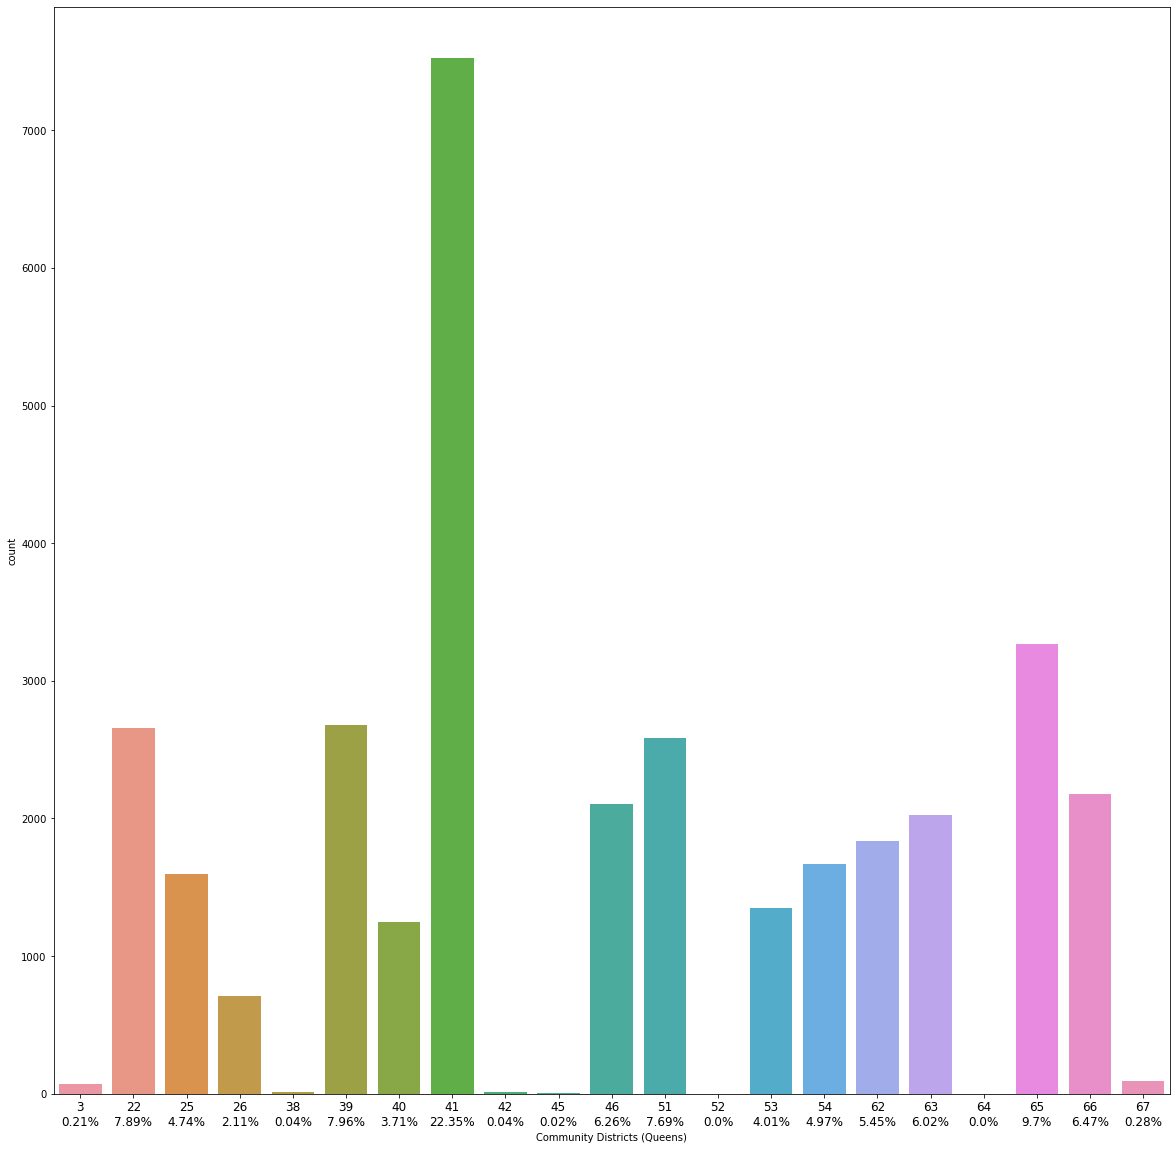

In [26]:
plt.figure(figsize=(20,20))
sns.countplot(x=q_data['Community District'])
_ = plt.xlabel('Community Districts (Queens)')
locs, label = plt.xticks()
new_xticks = labels4
_ = plt.xticks(locs, new_xticks, fontsize=12)

- Tourists Visit Guide (Queens)
- Safe Places to Visit : 3, 38, 42, 45, 52, 64, 67
- Concerened Places to Visit : 22, 25, 26, 39, 40, 41, 46, 51, 53, 54, 62, 63, 66
- Dangerous Places to Visit: 41, 65

## 2019 Staten Island Crime Rate Visualization (Community Districts)

In [28]:
s_cd_list = [4,15,30,31]
s_data = recent_data[recent_data['arrest_boro'] == 'S']
labels5 = []
for x in s_cd_list:
    labels5.append(str(x) + '\n' + str(round(len(s_data[s_data['Community District'] == x]) / len(s_data) * 100, 2))+'%')

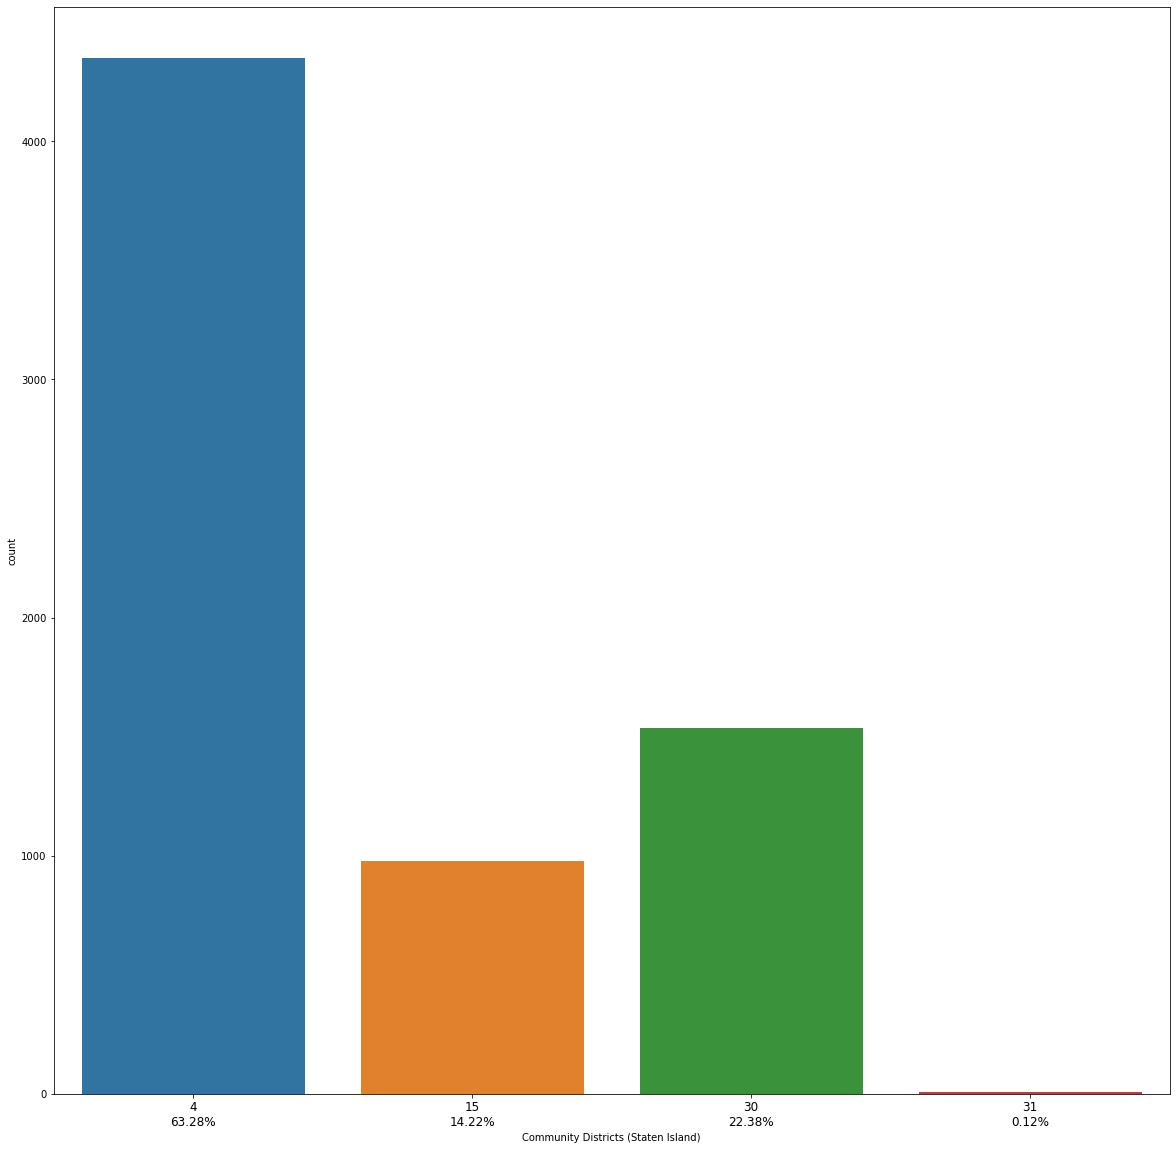

In [29]:
plt.figure(figsize=(20,20))
sns.countplot(x=s_data['Community District'])
_ = plt.xlabel('Community Districts (Staten Island)')
locs, label = plt.xticks()
new_xticks = labels5
_ = plt.xticks(locs, new_xticks, fontsize=12)

- Tourists Visit Guide (Staten Island)
- Safe Places to Visit : 31
- Concerened Places to Visit : 15, 30
- Dangerous Places to Visit: 4